# SMOTE算法
#### (1)对于少数类中每一个样本x，以欧氏距离为标准计算它到少数类样本集中所有样本的距离，得到其k近邻。 
#### (2)根据样本不平衡比例设置一个采样比例以确定采样倍率N，对于每一个少数类样本x，从其k近邻中随机选择若干个样本，假设选择的近邻为o。 
#### (3)对于每一个随机选出的近邻o，分别与原样本按照公式o(new)=o+rand(0,1)*(x-o)构建新的样本。

In [1]:
import pandas as pd
import numpy as np
import random

%matplotlib inline

In [2]:
data = pd.read_csv("../dataset/pima.csv")

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F89DFA6C50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F89E3BFBE0>]], dtype=object)

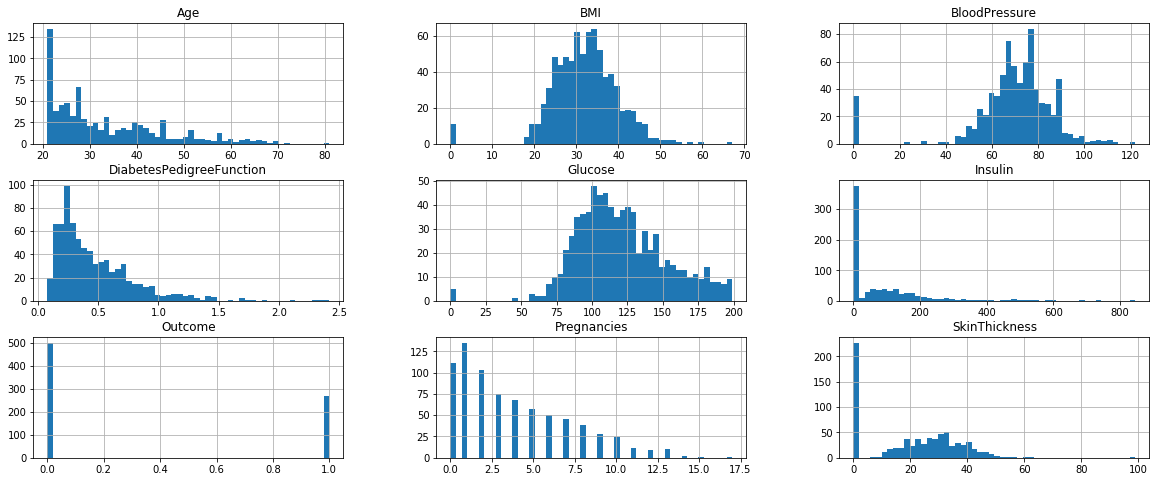

In [4]:
data.hist(bins=50,figsize=(20,8))

In [5]:
minor_data = data[data["Outcome"]==1].values.tolist()
major_data = data[data["Outcome"]==0].values.tolist()
print("少数类数量："+str(len(minor_data)))
print("多数类数量："+str(len(major_data)))

少数类数量：268
多数类数量：500


In [6]:
def SMOTE(N,k,minor_data,major_data):
    '''
    N：Amount of SMOTE N%,从k个近邻中随机选择N/100个，N最好为100的整数倍，如果为150，那么会在k个近邻中取int(N/100)个
    k：Number of nearest neighbors 近邻数量
    minor_data：少数类的数据,minor_data最后一列为类标
    major_data：多数类的数据
    '''
    #生成的数据
    generate_datas = []
    #拼接所有数据，少数类在上多数类在下
    all_data = np.r_[minor_data,major_data]
#     print(all_data)
    T = len(minor_data) #少数类的数量
    if N<100:
        T = int((N/100)*T)
        N = 100
    N = N/100
    #计算少数类的k个近邻
    for i in range(T):
        x = all_data[i]
        nnarray = get_knn(i,all_data,k,N)
        for o in nnarray:
            generate_data = list(o[0:-1]+random.random()*(x[0:-1]-o[0:-1]))
            generate_data.append(minor_data[0][-1])
            generate_datas.append(generate_data)
    #将生成的全部数据转换成ndarray格式
    generate_datas_arr = np.array(generate_datas)
    return np.r_[generate_datas_arr,all_data]
            
#利用欧氏距离求all_data[i]的k个近邻，近邻不包括all_data[i]
def get_knn(i,all_data,k,N):
    #避免影响原数据集
    all_data_cp = all_data.copy()
    #中心点
    center = all_data_cp[i]
    #删除角标为i的数据
    new_all_data = np.delete(all_data_cp,i,axis=0)
    #计算center到new_all_data的k个近邻
    distances = np.sqrt(np.sum((new_all_data[:,0:-1]-center[0:-1])**2,axis=1))
    #对距离从大到小进行排序（排序内容为距离对应的角标）
    k_distances_index = np.argsort(distances)[::-1][:k]
    #从k_distances_index随机选择N个
    randomN_k_distances_index = random.sample(list(k_distances_index),int(N))
    return new_all_data[randomN_k_distances_index]

imbalanced_data = SMOTE(100,5,minor_data,major_data)
print("少数类数量："+str(len(imbalanced_data[imbalanced_data[:,-1] == 1])))
print("多数类数量："+str(len(imbalanced_data[imbalanced_data[:,-1] == 0])))
    

少数类数量：536
多数类数量：500
